# The dataset


Content
candy-data.csv includes attributes for each candy along with its ranking. For binary variables, 1 means yes, 0 means no. The data contains the following fields:

chocolate: Does it contain chocolate?

fruity: Is it fruit flavored?

caramel: Is there caramel in the candy?

peanutalmondy: Does it contain peanuts, peanut butter or almonds?
nougat: Does it contain nougat?

crispedricewafer: Does it contain crisped rice, wafers, or a cookie component?

hard: Is it a hard candy?

bar: Is it a candy bar?

pluribus: Is it one of many candies in a bag or box?

sugarpercent: The percentile of sugar it falls under within the data set.

pricepercent: The unit price percentile compared to the rest of the set.

winpercent: The overall win percentage according to 269,000 matchups.

import the necessary libraries.

In [95]:
# This Python 3 environment comes with many helpful analytics libraries installed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport

Let's load the file and see what the data looks like.

In [96]:
candy = pd.read_csv('candy-data.csv')

In [97]:
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [98]:
candy.shape

(85, 13)

In [99]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.7+ KB


Reporting data to know more details about it

# EDA

In [100]:
def count(feature):
    
    # Show the counts of observations in each categorical bin using bars
    sns.countplot(x=feature,data=candy)
    

In [101]:
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


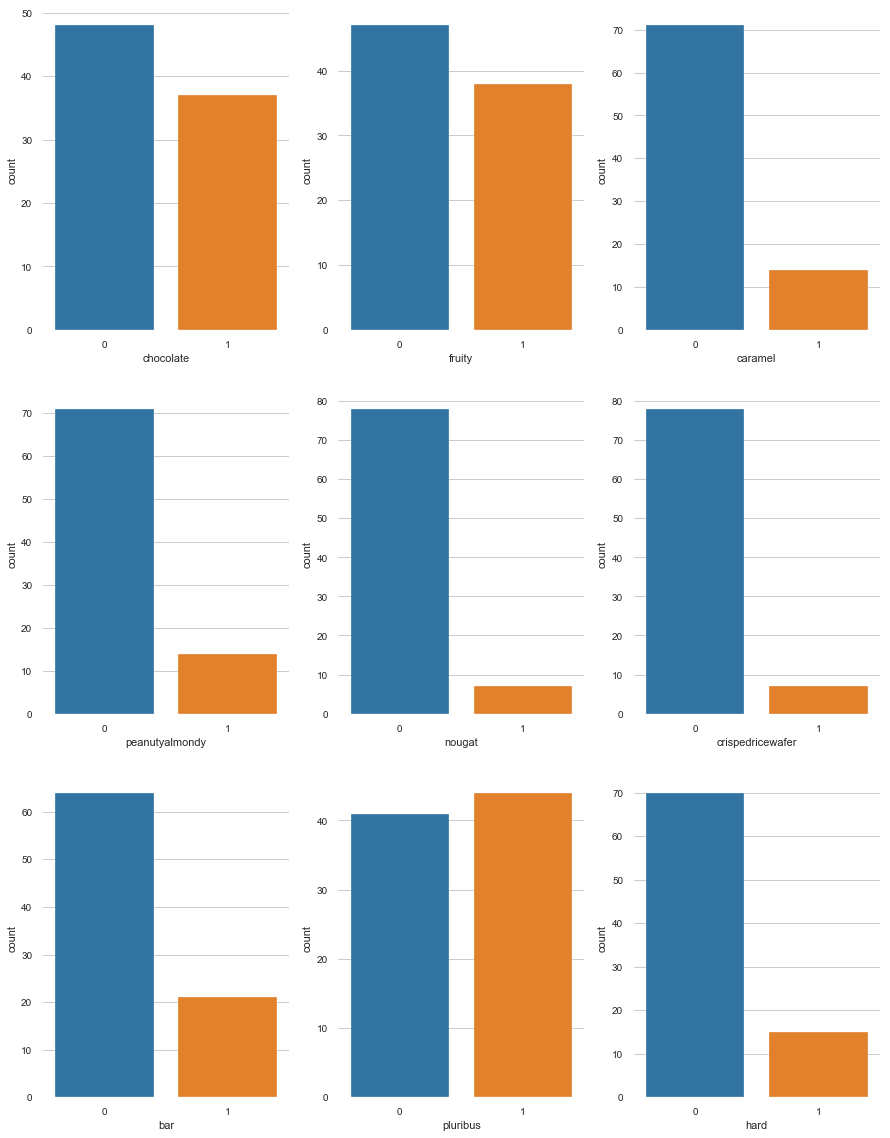

In [102]:
fig, ax = plt.subplots(3, 3,figsize=(15,20))
plt.subplot(3,3,1)
count('chocolate')
plt.subplot(3,3,2)
count('fruity')
plt.subplot(3,3,3)
count('caramel')
plt.subplot(3,3,4)
count('peanutyalmondy')
plt.subplot(3,3,5)
count('nougat')
plt.subplot(3,3,6)
count('crispedricewafer')
plt.subplot(3,3,7)
count('bar')
plt.subplot(3,3,8)
count('pluribus')
plt.subplot(3,3,9)
count('hard')

I can notice that most candies do not have a filling inside

The most common filling is chocolate and fruit

### Let's find out the percentages

In [103]:
def box(var):
    # this function take the variable and return a boxplot for each type of fish
    sns.boxplot(x="chocolate", y=var, data=candy,palette='rainbow')

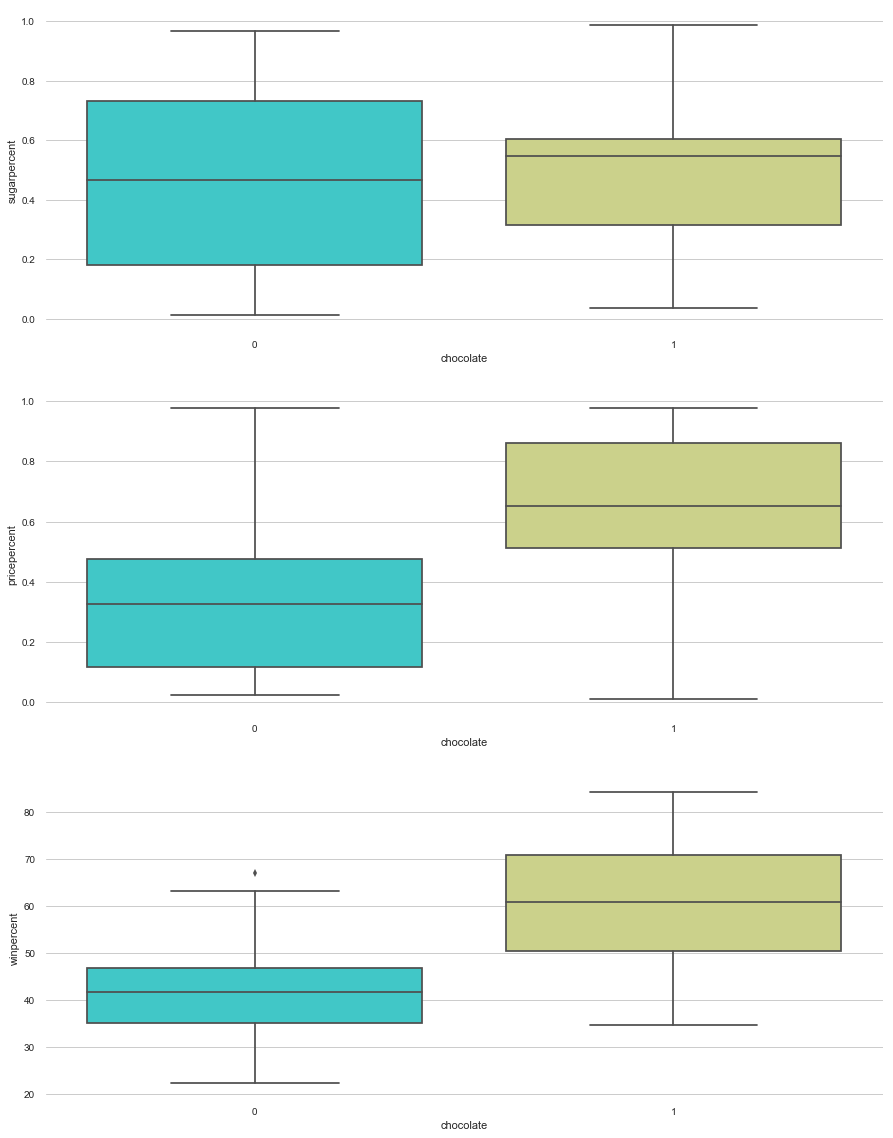

In [104]:
fig, ax = plt.subplots(3, 1,figsize=(15,20))
plt.subplot(3,1,1)
box('sugarpercent')
plt.subplot(3,1,2)
box('pricepercent')
plt.subplot(3,1,3)
box('winpercent')

We can see that the dessert that contains chocolate has an average sugar level,

more expensive than the rest,

and the percentage of winning it according to the larger matching cases

In [105]:
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


# Feature Selection

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 8 features for the dataset.

C:\Users\Seif Mohamed\Anaconda3(1)\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.25893701 0.01832881 0.07403321 0.01902236 0.01687753 0.03268906
 0.19375487 0.01875188 0.09641349 0.07808454 0.19310723]


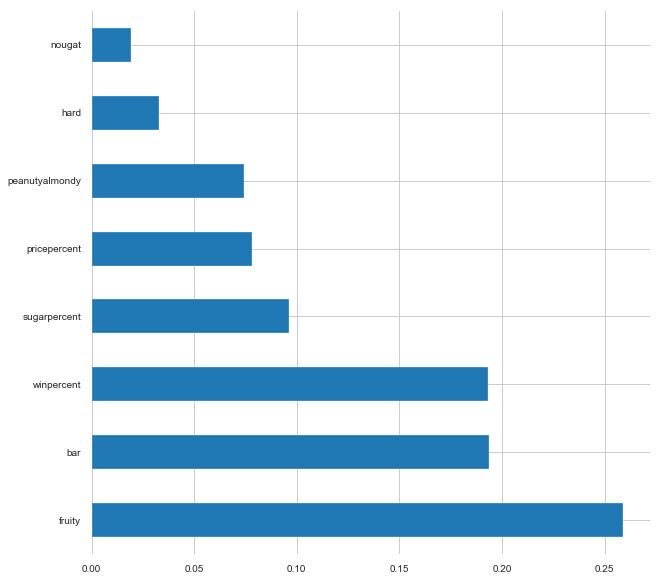

In [115]:
X = candy.drop(['chocolate','competitorname'],axis=1) #independent columns
y = candy['chocolate']   #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,10))
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

Now we can see the 8 most important variables in this data

# Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.
Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)
Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features 

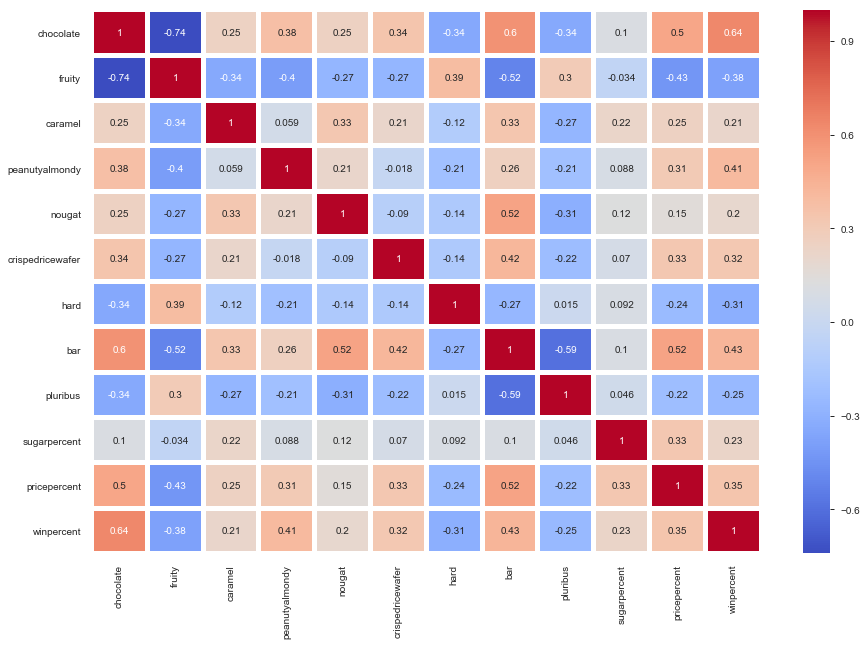

In [114]:
plt.figure(figsize=(15,10))
sns.heatmap(candy.corr(),cmap='coolwarm',annot=True,linecolor='white',linewidths=4)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [108]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.7+ KB


In [116]:
competitorname = pd.get_dummies(candy['competitorname'],drop_first=True)

In [118]:
candy.drop('competitorname',axis=1,inplace=True)

In [119]:
candy=pd.concat([candy,competitorname],axis=1)

In [121]:
candy.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,...,Tootsie Roll Juniors,Tootsie Roll Midgies,Tootsie Roll Snack Bars,Trolli Sour Bites,Twix,Twizzlers,Warheads,WelchÕs Fruit Snacks,WertherÕs Original Caramel,Whoppers
0,1,0,1,0,0,1,0,1,0,0.732,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0.604,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0.011,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0.011,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0.906,...,0,0,0,0,0,0,0,0,0,0


# Building a Logistic Regression model

### Training and Testing Data

In [122]:
X = candy.drop('chocolate',axis=1)
y = candy['chocolate']

In [126]:
#spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test =train_test_split(X,y, test_size = 0.2 , random_state=4)

# Training and Predicting

In [128]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

### fit the model

In [129]:
log.fit(X_train,y_train)

C:\Users\Seif Mohamed\Anaconda3(1)\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [131]:
predictions = log.predict(X_test)

Let's move on to evaluate our model!

# Evaluation

In [134]:
from sklearn.metrics import classification_report,confusion_matrix

In [133]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.86      0.86      0.86         7

   micro avg       0.88      0.88      0.88        17
   macro avg       0.88      0.88      0.88        17
weighted avg       0.88      0.88      0.88        17



In [135]:
confusion_matrix(y_test,predictions)

array([[9, 1],
       [1, 6]], dtype=int64)

In [136]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.8823529411764706


# model is ready